# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
prob_data = pd.read_csv('/kaggle/input/qwertyui/training_solutions_rev1/training_solutions_rev1.csv')
prob_data.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [2]:
def add_text(file_name):
    return f'{file_name}.jpg'

prob_data['GalaxyID'] = prob_data['GalaxyID'].apply(add_text)
prob_data.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [4]:
def classify_galaxy(probabilities):
    if probabilities['Class1.1']>=probabilities['Class1.2']:
        return "elliptical"
    else:
        if probabilities['Class4.1']>probabilities['Class4.2']:
            return "spiral"
        else:
            return "irregular"


In [5]:
new_data = prob_data[['GalaxyID', 'Class1.1', 'Class1.2', 'Class4.1', 'Class4.2']]
new_data = new_data[(new_data['Class1.1']>=0.8) | (new_data['Class1.2']>=0.8)].reset_index(drop=True)
new_data.head()

,GalaxyID,Class1.1,Class1.2,Class4.1,Class4.2
0,100090.jpg,0.933839,0.000000,0.000000,0.000000
1,100134.jpg,0.021834,0.976952,0.546491,0.408711
2,100237.jpg,0.164391,0.800759,0.387742,0.382223
3,100263.jpg,0.179654,0.818530,0.016623,0.228116
4,100322.jpg,0.091987,0.908013,0.000000,0.091207


In [6]:
new_data.loc[:, 'Classification'] = new_data.apply(classify_galaxy, axis=1)
new_data.head()

,GalaxyID,Class1.1,Class1.2,Class4.1,Class4.2,Classification
0,100090.jpg,0.933839,0.000000,0.000000,0.000000,elliptical
1,100134.jpg,0.021834,0.976952,0.546491,0.408711,spiral
2,100237.jpg,0.164391,0.800759,0.387742,0.382223,spiral
3,100263.jpg,0.179654,0.818530,0.016623,0.228116,irregular
4,100322.jpg,0.091987,0.908013,0.000000,0.091207,irregular


In [7]:
final_data = new_data[['GalaxyID', 'Classification']]
final_data.head(10)

,GalaxyID,Classification
0,100090.jpg,elliptical
1,100134.jpg,spiral
2,100237.jpg,spiral
3,100263.jpg,irregular
4,100322.jpg,irregular
5,100335.jpg,spiral
6,100380.jpg,spiral
7,100458.jpg,elliptical
8,100479.jpg,elliptical
9,100520.jpg,irregular


# visualization

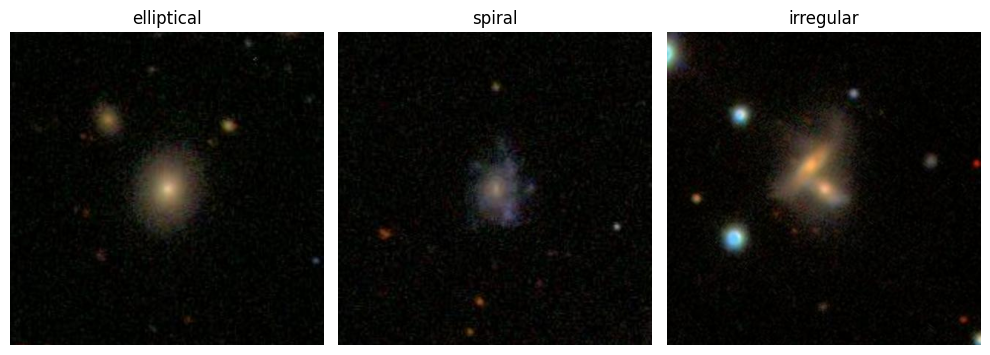

In [8]:
import os
import matplotlib.pyplot as plt
img_dir = '/kaggle/input/qwertyui/images_training_rev1/images_training_rev1'
unique_classes = final_data['Classification'].unique()
plt.figure(figsize=(10, 5))
for i,class_label in enumerate(unique_classes):
    image_file = final_data[final_data['Classification']==class_label].iloc[0]['GalaxyID']
    img_path = os.path.join(img_dir, image_file)
    img = plt.imread(img_path)
    plt.subplot(1, len(unique_classes), i+1)
    plt.imshow(img)
    plt.title(class_label)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [12]:
Label_to_num = {'elliptical':0, 'spiral':1, 'irregular':2}
final_data.loc[:, 'Label'] = final_data['Classification'].map(Label_to_num)
final_data.head()

/tmp/ipykernel_30/824714113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, 'Label'] = final_data['Classification'].map(Label_to_num)


,GalaxyID,Classification,Label
0,100090.jpg,elliptical,0
1,100134.jpg,spiral,1
2,100237.jpg,spiral,1
3,100263.jpg,irregular,2
4,100322.jpg,irregular,2


In [13]:
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class GalaxyDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.dataframe.iloc[idx, 0])
        label = self.dataframe.iloc[idx, 2]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label
    

transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

# split the Dataset into Train, valid and  Test

In [14]:
from sklearn.model_selection import train_test_split
train_data, temp_data = train_test_split(final_data, test_size=0.2, random_state=42, stratify=final_data['Classification'])
test_data, valid_data = train_test_split(temp_data, test_size=0.4, random_state=42, stratify=temp_data['Classification'])
train_data.shape, test_data.shape, valid_data.shape

((19418, 3), (2913, 3), (1942, 3))

In [15]:
img_dir = '/kaggle/input/qwertyui/images_training_rev1/images_training_rev1'
train_dataset = GalaxyDataset(dataframe=train_data, img_dir=img_dir, transform=transform)
dataloader_train = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = GalaxyDataset(dataframe=test_data, img_dir=img_dir, transform=transform)
dataloader_test = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_dataset = GalaxyDataset(dataframe=valid_data, img_dir=img_dir, transform=transform)
dataloader_valid = DataLoader(valid_dataset, batch_size=32, shuffle=True)
len(dataloader_train), len(dataloader_test), len(dataloader_valid)

(607, 92, 61)

# checking class imbalance

In [16]:
from collections import Counter
label_counter = Counter()
for images, labels in dataloader_test:
    label_counter.update(labels.numpy())
for label, count in sorted(label_counter.items()):
    print(f'Label {label}: {count}')

Label 0: 976
Label 1: 1308
Label 2: 629


In [17]:
label_counter = Counter()
for images, labels in dataloader_valid:
    label_counter.update(labels.numpy())
for label, count in sorted(label_counter.items()):
    print(f'Label {label}: {count}')

Label 0: 650
Label 1: 872
Label 2: 420


In [18]:
label_counter = Counter()
for images, labels in dataloader_train:
    label_counter.update(labels.numpy())
for label, count in sorted(label_counter.items()):
    print(f'Label {label}: {count}')

Label 0: 6506
Label 1: 8717
Label 2: 4195


# Load the pre-trained Model

In [21]:
from src.models.DenseNet_model import DenseNet_121
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [25]:
from sklearn.metrics import classification_report, accuracy_score
def train_model(model, train_loader, criterion, optimizer, val_loader, num_epochs):
    training_loss = []
    validation_loss = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        training_loss.append(epoch_loss)
        # Evaluate model
        model.eval()
        val_loss = 0.
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss+=loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        val_loss /= len(val_loader)  # Average validation loss
        validation_loss.append(val_loss)
        accuracy = (correct / total) * 100
        print(f'epoch : {epoch + 1}/{num_epochs}, train_loss: {epoch_loss:.5f}, valid_loss:{val_loss:.5f}, accuracy: {accuracy:.2f}%')
    print('Training Completed')
    plt.plot(training_loss, label='train loss')
    plt.plot(validation_loss, label='val loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.show()


def evaluate_model(model, data_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, pred = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy obtained from trained model:{accuracy}')
    print(classification_report(y_true, y_pred, target_names=['elliptical', 'spiral', 'irregular'], zero_division=0))

# fine-tuning the Model using Lora Method

In [30]:
pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 6.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


**i have trained for 20 epochs, after the 6th epoch there is no improvement in the accuracy and the accuracy is decreasing. so, i have stopped training early at 6th epoch**

epoch : 1/10, train_loss: 0.77944, valid_loss:0.66634, accuracy: 73.43%
epoch : 2/10, train_loss: 0.69703, valid_loss:0.64764, accuracy: 73.17%
epoch : 3/10, train_loss: 0.68665, valid_loss:0.64187, accuracy: 73.58%
epoch : 4/10, train_loss: 0.67283, valid_loss:0.62016, accuracy: 74.36%
epoch : 5/10, train_loss: 0.66426, valid_loss:0.62875, accuracy: 74.20%
epoch : 6/10, train_loss: 0.64930, valid_loss:0.67142, accuracy: 72.66%
epoch : 7/10, train_loss: 0.64675, valid_loss:0.62067, accuracy: 76.21%
epoch : 8/10, train_loss: 0.64534, valid_loss:0.61675, accuracy: 75.90%
epoch : 9/10, train_loss: 0.63771, valid_loss:0.61067, accuracy: 75.49%
epoch : 10/10, train_loss: 0.63246, valid_loss:0.63972, accuracy: 76.16%
Training Completed


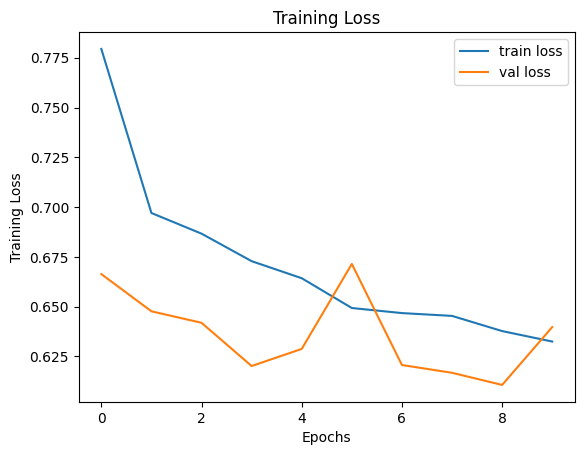

In [36]:
from peft import get_peft_model, LoraConfig
def apply_lora(model):
    lora_config = LoraConfig(
        r=8,  
        lora_alpha=32,
        lora_dropout=0.1,target_modules=["0", "3"]  
    )
    model = get_peft_model(model, lora_config)
    return model

class_counts = [6506, 8717, 4195]
class_weights = [1.0 / count for count in class_counts]
class_weights = torch.tensor(class_weights).to(device)
# Normalize weights
class_weights = class_weights / class_weights.sum()
model2 = DenseNet121Custom(num_classes=3).to(device)
model_with_lora = apply_lora(model2)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model_with_lora.parameters(), lr=0.001)
train_model(model_with_lora, dataloader_train, criterion, optimizer, dataloader_valid, num_epochs=10)

Accuracy obtained from trained model:77.99519395811878


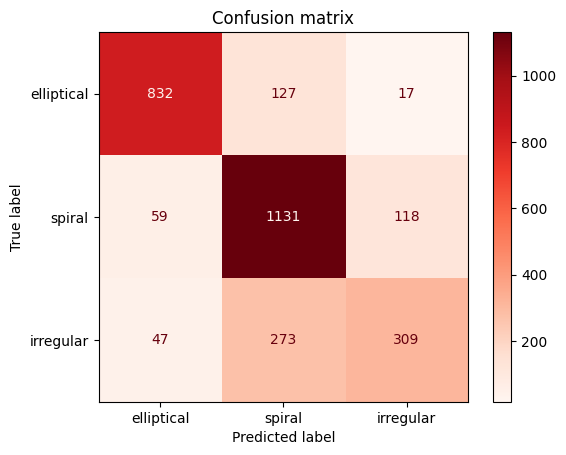

In [37]:
print_results(model_with_lora, dataloader_test)

In [38]:
save_path = 'densenet-121_with_lora.pth'
torch.save(model2.state_dict(), save_path)